In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
project_folder=os.getenv("HOME")+"/lipid_cargo_transport_v2/"

In [4]:
df=pd.read_csv('force_correlations_variance_with_rotation.csv',index_col=0)

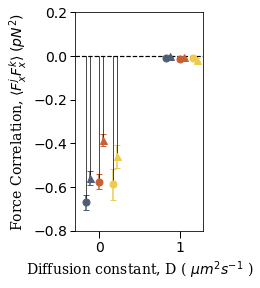

In [8]:
df_corr=df
df_corr=df_corr.astype({"no_bound": int})

#corr_err=df_corr_piv["error (pN2)"]

my_colors=['#4D5E76','#C66037','#EDCB51']

fig, axes = plt.subplots(figsize=(3,8))
[llsiz,lfsiz]=[12,12]

colmn=[2,3,4]
gap=0.1
shift=0.6
rshift=0.03
marker=['o','^']

R_mar={0:['o',"Without rotation"],1:['^','With rotation']}

def plotter(ax,df_corr):
    for r in [0,1]:
            df_corr_ext=df_corr[df_corr["Rotation"]==r]
            df_corr_piv=df_corr_ext.pivot(index="D",columns='no_bound')
            corr_df=df_corr_piv["mean_fi_fj (pN2)"]
            corr_err=df_corr_piv["error_corr (pN2)"]
            
            for ii in range(len(colmn)):
                colm=colmn[ii]
                if r==0:
                    ax.errorbar([ii*gap+rshift*r,rshift*r+shift+ii*gap], corr_df[colm], yerr=corr_err[colm], 
                                 marker=R_mar[r][0], capsize=3,color=my_colors[ii],linestyle='None',markersize=7,label=r'$n=$'+str(colm))

                else:
                    ax.errorbar([ii*gap+rshift*r,rshift*r+shift+ii*gap], corr_df[colm], yerr=corr_err[colm], 
                                 marker=R_mar[r][0], capsize=3,color=my_colors[ii],linestyle='None',markersize=7)

                bar_lw=0.7
                bar_col='k'
                ax.plot([ii*gap+rshift*r,rshift*r+ii*gap],[0,corr_df[colm][0]],color=bar_col,lw=bar_lw)
                ax.plot([shift+ii*gap+rshift*r,rshift*r+shift+ii*gap],[0,corr_df[colm][1]],color=bar_col,lw=bar_lw)
            ax.set_xticks([gap,gap+shift])
                #
            ax.set_xticklabels(['0','1'])
            free_length=0.075
            ax.set_xlim([-free_length,shift+ii*gap+free_length])
    return ax

axes=plotter(axes,df_corr)
axes.set_ylim([-0.8,0.2])
axes.axhline(y=0,linestyle='--',lw=1.2,color='k')

#axes=plotter(var_df_rescale,var_err_df_rescale,axes[0])
#axes.set_ylim([0,4.8])


[llsiz,lfsiz]=[14,14]
#axes.legend(fontsize=lfsiz-1,title='Bound motors',frameon=False)
#axes[1].legend(title='bound motors',handles=handles,labels=new_labels,bbox_to_anchor=(0.385, 0.84))
axes.set_xlabel(r'Diffusion constant, D ( $\mu m^2 s^{-1}$ )',fontname='serif',fontsize=lfsiz)
#axes[0].set_ylabel(r'Mean Variance, $\langle \sigma_{|f|}^2 \rangle \; (pN^2)$',fontname='serif',fontsize=lfsiz)
axes.tick_params(axis='both',which='both', labelsize=llsiz)
axes.tick_params(axis='both',which='major',length=5,width=1)
#axes.set_xlabel(r'$D$ ($\mu m^2s^{-1}$)',fontname='serif',fontsize=lfsiz)
axes.set_ylabel(r'Force Correlation, $\langle F_{x}^{j} F_{x}^{k} \rangle \; (pN^2)$ ',fontname='serif',fontsize=lfsiz)
#axes[0].tick_params(axis='both',which='both', labelsize=llsiz)
#axes[0].tick_params(axis='both',which='major',length=5,width=1 )

#for ax in axes:
axes.tick_params(axis='x',which='major',length=7,width=1)
plt.tight_layout()
fig.set_size_inches(4,3.5)

filename="correlations"
fig.savefig(filename+".svg", bbox_inches='tight')
fig.savefig(filename+".pdf", bbox_inches='tight')
fig.savefig(filename+".eps", bbox_inches='tight')
fig.savefig(filename+".png", bbox_inches='tight',dpi=600)

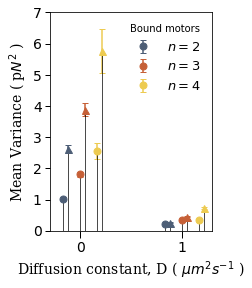

In [9]:

fig, axes = plt.subplots(figsize=(3,8))

def plotter(ax,df_corr):
    for r in [0,1]:
            df_corr_ext=df_corr[df_corr["Rotation"]==r]
            df_corr_piv=df_corr_ext.pivot(index="D",columns='no_bound')
            corr_df=df_corr_piv["mean_variance (pN2)"]
            corr_err=df_corr_piv["error_variance (pN2)"]
            
            for ii in range(len(colmn)):
                colm=colmn[ii]
                if r==0:
                    ax.errorbar([ii*gap+rshift*r,rshift*r+shift+ii*gap], corr_df[colm], yerr=corr_err[colm], 
                                 marker=R_mar[r][0], capsize=3,color=my_colors[ii],linestyle='None',markersize=7,label=r'$n=$'+str(colm))

                else:
                    ax.errorbar([ii*gap+rshift*r,rshift*r+shift+ii*gap], corr_df[colm], yerr=corr_err[colm], 
                                 marker=R_mar[r][0], capsize=3,color=my_colors[ii],linestyle='None',markersize=7)

                bar_lw=0.7
                bar_col='k'
                ax.plot([ii*gap+rshift*r,rshift*r+ii*gap],[0,corr_df[colm][0]],color=bar_col,lw=bar_lw)
                ax.plot([shift+ii*gap+rshift*r,rshift*r+shift+ii*gap],[0,corr_df[colm][1]],color=bar_col,lw=bar_lw)
            ax.set_xticks([gap,gap+shift])
                #
            ax.set_xticklabels(['0','1'])
            free_length=0.075
            ax.set_xlim([-free_length,shift+ii*gap+free_length])
    return ax

axes=plotter(axes,df_corr)
axes.set_ylim([0,7])
[llsiz,lfsiz]=[14,14]
axes.legend(fontsize=lfsiz-1,title='Bound motors',frameon=False)
#axes[1].legend(title='bound motors',handles=handles,labels=new_labels,bbox_to_anchor=(0.385, 0.84))
axes.set_xlabel(r'Diffusion constant, D ( $\mu m^2 s^{-1}$ )',fontname='serif',fontsize=lfsiz)
#axes[0].set_ylabel(r'Mean Variance, $\langle \sigma_{|f|}^2 \rangle \; (pN^2)$',fontname='serif',fontsize=lfsiz)
axes.tick_params(axis='both',which='both', labelsize=llsiz)
axes.tick_params(axis='both',which='major',length=5,width=1)
#axes.set_xlabel(r'$D$ ($\mu m^2s^{-1}$)',fontname='serif',fontsize=lfsiz)
axes.set_ylabel(r'Mean Variance ( p$N^2$ )',fontname='serif',fontsize=lfsiz)
#axes[0].tick_params(axis='both',which='both', labelsize=llsiz)
#axes[0].tick_params(axis='both',which='major',length=5,width=1 )

#for ax in axes:
axes.tick_params(axis='x',which='major',length=7,width=1)
plt.tight_layout()
fig.set_size_inches(4,3.5)

filename="variance"
fig.savefig(filename+".svg", bbox_inches='tight')
fig.savefig(filename+".pdf", bbox_inches='tight')
fig.savefig(filename+".eps", bbox_inches='tight')
fig.savefig(filename+".png", bbox_inches='tight',dpi=600)